In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = (np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y


In [2]:
def least_square_estimator(X, y):
    """
    if matrix shape is wrong, raise error
    
    return psuedoinverse of X x y, if X is full rank this will return the inverse
    """
    if X.shape[0]<=X.shape[1]:
        
        raise ValueError ("n is less than d+1")
        
    return np.linalg.pinv(X) @ y

def empirical_risk(X,y,b):
    """
    sum empirical risk for given data/model
    """
    total_resid = sum(((X@b)-y)**2)
        
    return total_resid/len(y)
        
def estimate_b_hat (x_train, y_train, degree):
    
    matrix = get_design_mat (x_train, degree)
    
    return least_square_estimator (matrix, y_train)

def degree_array_creator (x, degree):
    """
    create array of x**0, x**1...x**degree+1
    
    """
    return np.array([x**i for i in range(degree+1)])

def min_d_estimator(degree):
    
    a=get_a(degree)
    x1, y_train = draw_sample(degree, a, 100)
    x2, y_test = draw_sample(degree, a, 1000)
    
    
    for i in range(10,20):
        
        x_train = get_design_mat(x1,i)
        x_test = get_design_mat(x2,i)
        b_hat= least_square_estimator(x_train, y_train)
        risk = empirical_risk (x_test,y_test,b_hat)
        print(i)
        print(risk)
        print(b_hat)
        print(np.linalg.norm(b_hat, 2))
        
def noisy_risks(x_train, y_train, x_test, y_test, d):
    
    train_mat = get_design_mat (x_train, d)
    test_mat = get_design_mat (x_test, d)
    b_hat = least_square_estimator (train_mat, y_train)
    
    return empirical_risk(train_mat, y_train, b_hat), empirical_risk(test_mat, y_test, b_hat), b_hat

def gen_arrays_over_n (x_train, y_train, x_test, y_test, N, d_array):
    
    big_dict = dict()
    
    for d in d_array:
        
        xs_array = list(range(d+1,N))
        risk_array_train = list()
        risk_array_test = list()
        b_hat_array = list()
        
        for i in range(d+1,N):
            
            spec_x_train = x_train[:i+1]
            spec_y_train = np.array(y_train[:i+1])
            risk_train, risk_test, b_hat = noisy_risks(spec_x_train, spec_y_train, x_test, y_test, d)
            risk_array_train.append(risk_train)
            risk_array_test.append(risk_test)
            b_hat_array.append(b_hat)
            
        big_dict[d] = [risk_array_train, risk_array_test, xs_array, b_hat_array]
    
    
    return big_dict
        
def plot_arrays_from_dict(array_dict,indic):
    
    plt.figure(figsize=(15,8))
    
    for key in array_dict.keys():
        
        if indic=="yes":
            plt.plot(array_dict[key][2],array_dict[key][0], label = "d="+str(key)+" train")
        plt.plot(array_dict[key][2],array_dict[key][1], label = "d="+str(key)+" test")
    
    
    plt.yscale('log')   
    plt.legend()    
    plt.show()            

**Q1)** An obvious Bayes Predictor here is just using the formula for y

Bayes: $\hat{y} = a_0 + a_1x_1 + a_2x_2$

with $\hat{y}$ defined this way, we can see that risk would be minimized

$R(f^*) = L(\hat{y}-y)^2$

$R(f^*) = L(y-y)^2 = 0$

Since our loss function is squared difference, our risk cannot be negative. Therefore risk is minimized at 0, as above

**Q2)** Our Bayes Predictor from question 1 is in the $H_2$ hypothesis space, as this is a polynomial of degree 2. Therefore, this function is a risk minimizer

Approximation error = $R(f_F) - R(f^*) = 0 $

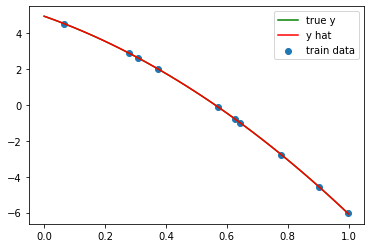

we are able to estimate underlying exactly. Our b hat function corresponds exactly to the true relationship


In [3]:
a=get_a(2)
x_train, y_train = draw_sample (2,a,10)
x_test, y_test = draw_sample (2,a,1000)
b_hat = estimate_b_hat (x_train, y_train, 2)

x=np.linspace(0,1,100)
y_true = a@degree_array_creator(x,2)
y_pred = b_hat@degree_array_creator(x,2)


import matplotlib.pyplot as plt
plt.scatter(x_train,y_train, label='train data')
plt.plot(x,y_true, 'g', label='true y')
plt.plot(x, y_pred, 'r', label='y hat')#comment out this line to see underlying relationship
plt.legend()
plt.show()

print("we are able to estimate underlying exactly. Our b hat function corresponds exactly to the true relationship")

**Q10)** We need a polynomial of at least d=2 in order to estimate our data perfectly. This matches our response from question 4 because any $H_d$ where d is less than 2 will not include our ideal function (f*). This result aligns with what we see for empirical risk below.

In [4]:
for i in range(1,6):
    
    degree_test = get_design_mat(x_test,i)
    b_hat = estimate_b_hat(x_train, y_train, i)
    risk = empirical_risk(degree_test,y_test, b_hat)
    print("empirical risk is ",str(risk),"for degree ",str(i))

empirical risk is  0.1635536043167962 for degree  1
empirical risk is  4.970820168513171e-31 for degree  2
empirical risk is  8.26750560238592e-30 for degree  3
empirical risk is  1.31975922999282e-27 for degree  4
empirical risk is  1.3232470738951088e-25 for degree  5


**Q11)**

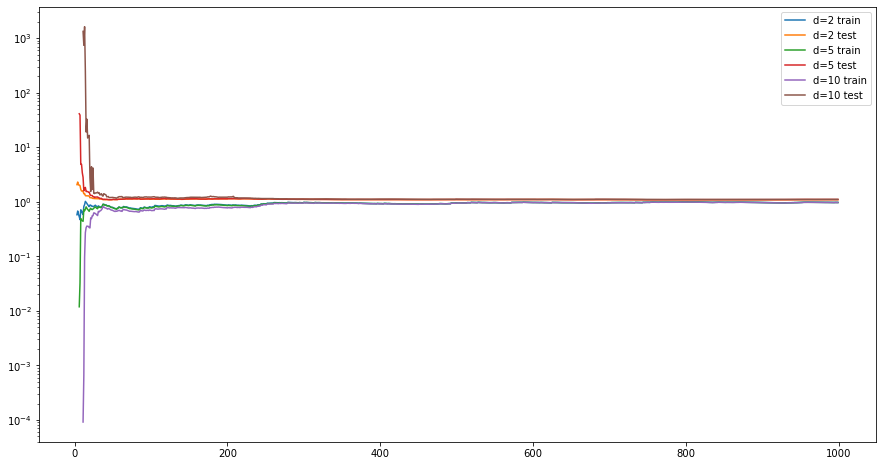

In [5]:
a=get_a(2)
x_train, y_train = draw_sample_with_noise (2,a,1000)
x_test, y_test = draw_sample_with_noise (2,a,1000)

array_dict = gen_arrays_over_n (x_train, y_train, x_test,y_test,1000,[2,5,10])
plot_arrays_from_dict(array_dict,"yes")


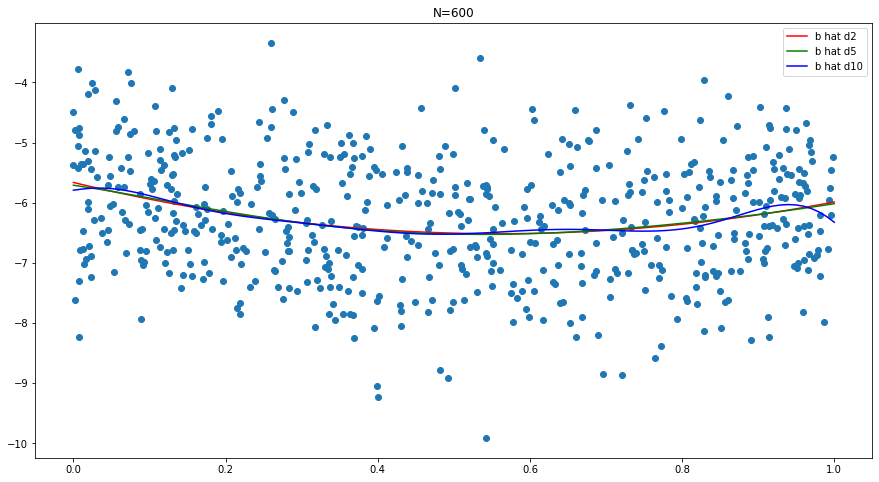

In [12]:
x=np.linspace(0,1,100)
y_true = a@degree_array_creator(x,2)
#y_pred = b_hat@degree_array_creator(x,2)

#N=600
b_hat_600_d2 = array_dict[2][3][597]
b_hat_600_d5 = array_dict[5][3][594]
b_hat_600_d10 = array_dict[10][3][589]
y_pred_600_d2 = b_hat_600_d2@degree_array_creator(x,2)
y_pred_600_d5 = b_hat_600_d5@degree_array_creator(x,5)
y_pred_600_d10 = b_hat_600_d10@degree_array_creator(x,10)

plt.figure(figsize=(15,8))

plt.plot(x,y_pred_600_d2,'r', label = 'b hat d2')
plt.plot(x,y_pred_600_d5,'g', label = 'b hat d5')
plt.plot(x,y_pred_600_d10,'b', label = 'b hat d10')
plt.scatter(x_train[:600],y_train[:600])
plt.legend()
plt.title("N=600")
plt.show()

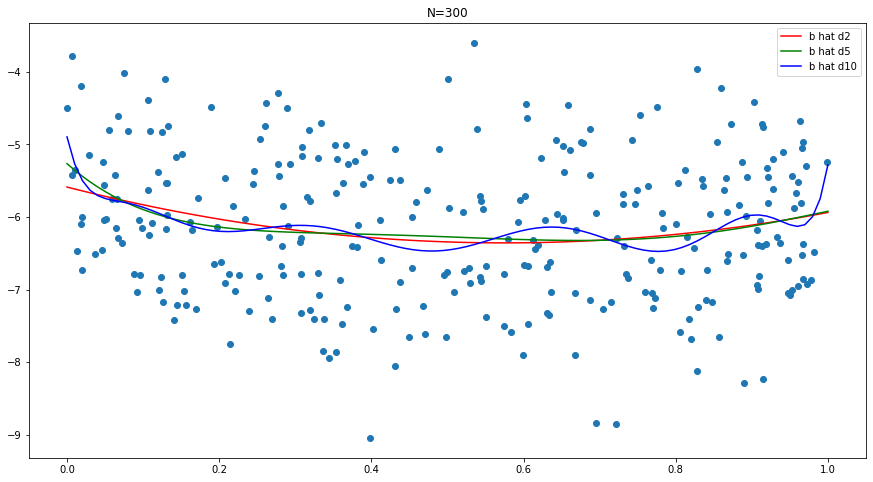

In [11]:
x=np.linspace(0,1,100)
b_hat_300_d2 = array_dict[2][3][297]
b_hat_300_d5 = array_dict[5][3][294]
b_hat_300_d10 = array_dict[10][3][289]
y_pred_300_d2 = b_hat_300_d2@degree_array_creator(x,2)
y_pred_300_d5 = b_hat_300_d5@degree_array_creator(x,5)
y_pred_300_d10 = b_hat_300_d10@degree_array_creator(x,10)

plt.figure(figsize=(15,8))

plt.plot(x,y_pred_300_d2,'r', label = 'b hat d2')
plt.plot(x,y_pred_300_d5,'g', label = 'b hat d5')
plt.plot(x,y_pred_300_d10,'b', label = 'b hat d10')
plt.scatter(x_train[:300],y_train[:300])
plt.legend()
plt.title("N=300")
plt.show()

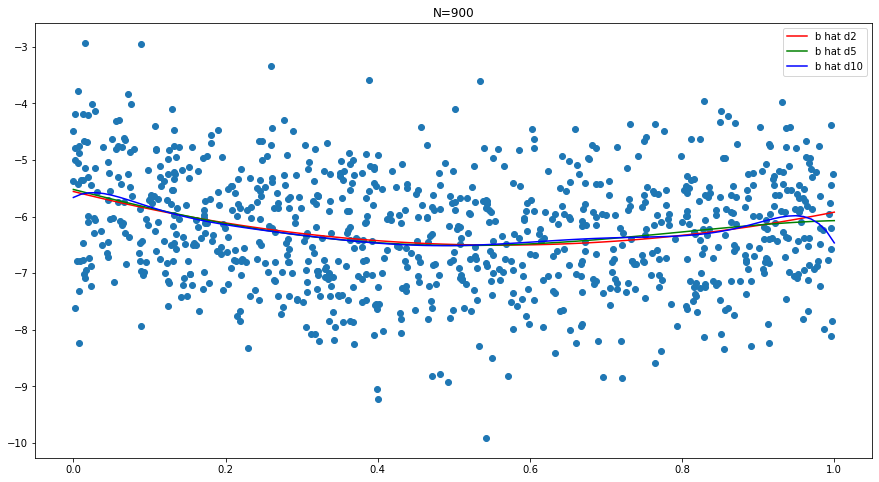

In [13]:
x=np.linspace(0,1,100)

b_hat_900_d2 = array_dict[2][3][897]
b_hat_900_d5 = array_dict[5][3][894]
b_hat_900_d10 = array_dict[10][3][889]
y_pred_900_d2 = b_hat_900_d2@degree_array_creator(x,2)
y_pred_900_d5 = b_hat_900_d5@degree_array_creator(x,5)
y_pred_900_d10 = b_hat_900_d10@degree_array_creator(x,10)

plt.figure(figsize=(15,8))

plt.plot(x,y_pred_900_d2,'r', label = 'b hat d2')
plt.plot(x,y_pred_900_d5,'g', label = 'b hat d5')
plt.plot(x,y_pred_900_d10,'b', label = 'b hat d10')
plt.scatter(x_train[:900],y_train[:900])
plt.legend()
plt.title("N=900")
plt.show()

**Q12)** Since the ideal polynomial (of degree two) is in our hypothesis space for polynomials of degree 2, 5, and 10, approximation error is 0. We cannot capture the noise term in any function (as it is random), so our calculation of total risk includes Bayes risk. Additionally, since we are calculating an inverse/psuedoinverse of our degree matrix, there is no optimization error (we always arrive at the precise least squares solution.) The ideal model (degree 2 polynomial with coefficients corresponding to a.) Since our loss function is squared, Risk minimizing function will still have risk of 1.

$E(\hat{y} -(y-e))^2 = E(e^2) = 1$

We could have reached this same conclusion about error by observing the fact that estimation error approaches 0 as N becomes large. In our case, our total error goes to 1. Since we have no optimization error or approximation error, this Bayes risk must be 1.

Estimation error = total error -approx error- optimization error- bayes risk

Estimation error = total error -1 = 0 for all points


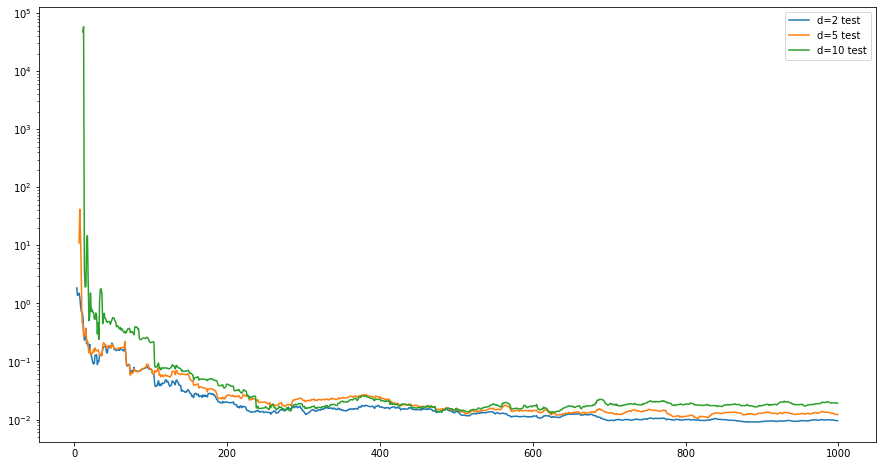

In [14]:
a=get_a(2)
x_train, y_train = draw_sample_with_noise (2,a,1000)
x_test, y_test = draw_sample_with_noise (2,a,1000)

array_dict = gen_arrays_over_n (x_train, y_train, x_test,y_test,1000,[2,5,10])

for item in array_dict.keys():
    array_dict[item][1]=np.array(array_dict[item][1])-1
    
plot_arrays_from_dict(array_dict, "no")

**Q13)** Estimation error decreases with N for all d. This is because our model minimizes empirical risk, which converges to risk as N increases. Increasing d increases estimation error, as our higher degree model is more prone to overfitting training data. Eventually though, estimation risk approaches 0 even for greater values of d as we fit on a higher number of points, given empirical risk still approaches risk as N grows.

**Q14)** Because we are calculating the psuedo-inverse or inverse of our degree matrix in order to arrive at $\hat{b}$, there is no optimization error here. We arrive exactly at the least squares solutions which minimizes empirical risk. If we had used gradient descent or some other minimization algorithm instead of inverting our matrix, we might then have optimization error.

**Q15)** Ozone Data

In [15]:
ozone_data = np.loadtxt("C:\\Users\\jonah\\Downloads\\hw1\\hw1\\ozone_wind.data") 
wind_train = ozone_data[:,1][:75]
wind_test = ozone_data[:,1][75:]
ozone_train = ozone_data[:,0][:75]
ozone_test = ozone_data[:,0][75:]

In [16]:
for i in range(1,20):
    
    degree_test = get_design_mat(wind_test,i)
    b_hat = estimate_b_hat(wind_train, ozone_train, i)
    risk = empirical_risk(degree_test,ozone_test, b_hat)
    print("empirical risk is ",str(risk),"for degree ",str(i))



empirical risk is  710.3218414945228 for degree  1
empirical risk is  508.81846626205424 for degree  2
empirical risk is  591.8622729834278 for degree  3
empirical risk is  979.9619141748556 for degree  4
empirical risk is  509.4477934995163 for degree  5
empirical risk is  469.00615869429646 for degree  6
empirical risk is  659.2581974181584 for degree  7
empirical risk is  1379.2881100685584 for degree  8
empirical risk is  489.9886824660414 for degree  9
empirical risk is  473.8132019888933 for degree  10
empirical risk is  528.8481278740984 for degree  11
empirical risk is  674.2065151374841 for degree  12
empirical risk is  1437.4559785329757 for degree  13
empirical risk is  1705.0816839344068 for degree  14
empirical risk is  1887.6888626599346 for degree  15
empirical risk is  2046.5169748325632 for degree  16
empirical risk is  2628.8681635690423 for degree  17
empirical risk is  2737.141385338922 for degree  18
empirical risk is  2819.4060057730712 for degree  19


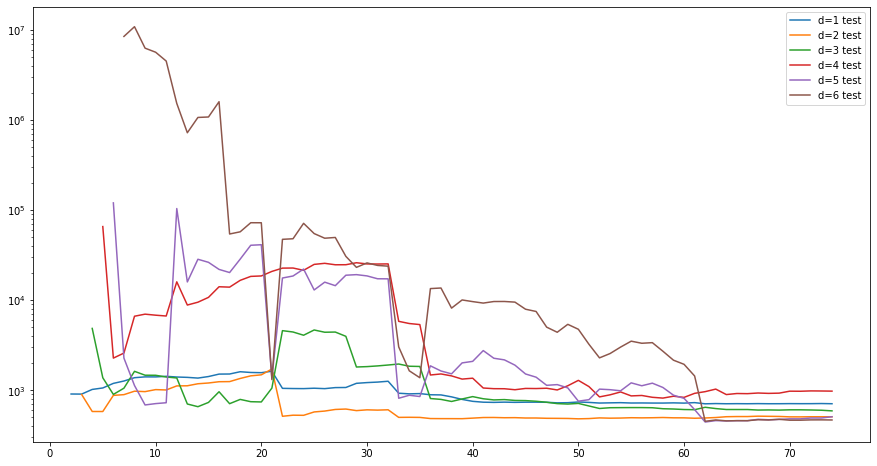

In [19]:
ozone_array_dict = gen_arrays_over_n (wind_train, ozone_train, wind_test, ozone_test,75, list(range(1,7)))
plot_arrays_from_dict (ozone_array_dict,"no")

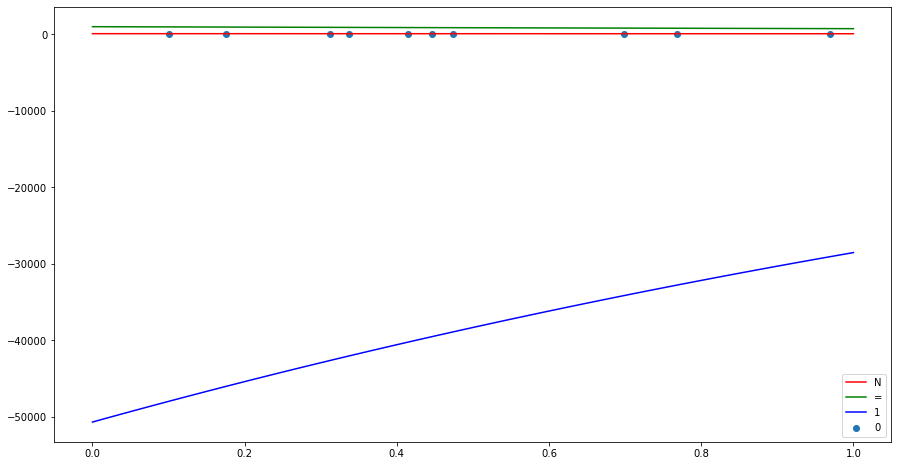

In [25]:
x=np.linspace(0,1,100)

b_hat_10_d2 = ozone_array_dict[2][3][7]
b_hat_10_d4 = ozone_array_dict[4][3][5]
b_hat_10_d6 = ozone_array_dict[6][3][3]
y_pred_10_d2 = b_hat_10_d2@degree_array_creator(x,2)
y_pred_10_d4 = b_hat_10_d4@degree_array_creator(x,4)
y_pred_10_d6 = b_hat_10_d6@degree_array_creator(x,6)

plt.figure(figsize=(15,8))

plt.plot(x,y_pred_10_d2,'r', label = 'b hat d2')
plt.plot(x,y_pred_10_d4,'g', label = 'b hat d4')
plt.plot(x,y_pred_10_d6,'b', label = 'b hat d6')
plt.scatter(x_train[:10],y_train[:10])
plt.legend()
plt.legend("N=10")
plt.show()

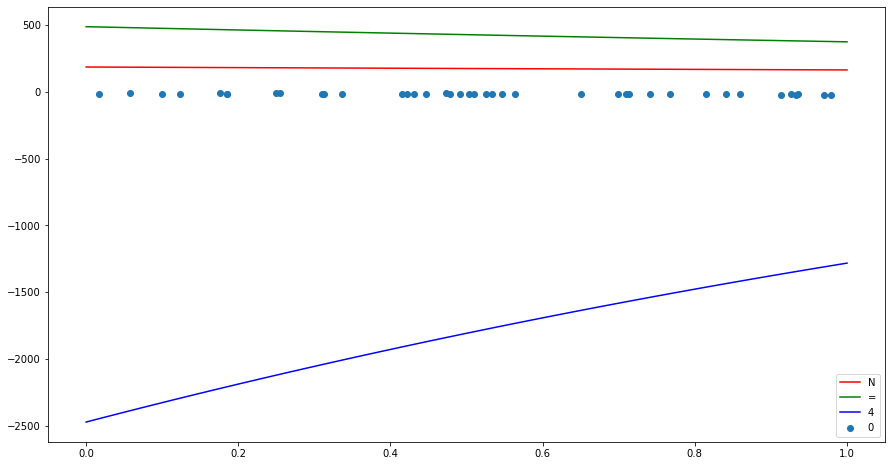

In [24]:
x=np.linspace(0,1,100)

b_hat_40_d2 = ozone_array_dict[2][3][37]
b_hat_40_d4 = ozone_array_dict[4][3][35]
b_hat_40_d6 = ozone_array_dict[6][3][33]
y_pred_40_d2 = b_hat_40_d2@degree_array_creator(x,2)
y_pred_40_d4 = b_hat_40_d4@degree_array_creator(x,4)
y_pred_40_d6 = b_hat_40_d6@degree_array_creator(x,6)

plt.figure(figsize=(15,8))

plt.plot(x,y_pred_40_d2,'r', label = 'b hat d2')
plt.plot(x,y_pred_40_d4,'g', label = 'b hat d4')
plt.plot(x,y_pred_40_d6,'b', label = 'b hat d6')
plt.scatter(x_train[:40],y_train[:40])
plt.legend()
plt.legend("N=40")
plt.show()

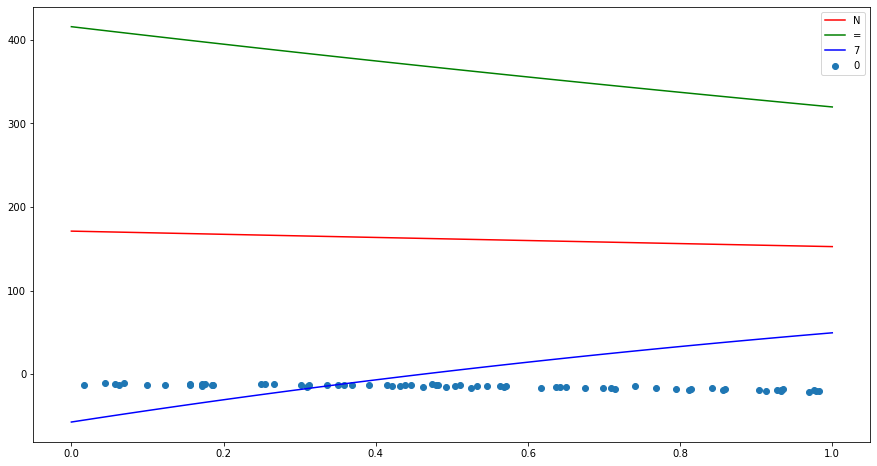

In [23]:
x=np.linspace(0,1,100)

b_hat_40_d2 = ozone_array_dict[2][3][67]
b_hat_40_d4 = ozone_array_dict[4][3][65]
b_hat_40_d6 = ozone_array_dict[6][3][63]
y_pred_40_d2 = b_hat_40_d2@degree_array_creator(x,2)
y_pred_40_d4 = b_hat_40_d4@degree_array_creator(x,4)
y_pred_40_d6 = b_hat_40_d6@degree_array_creator(x,6)

plt.figure(figsize=(15,8))

plt.plot(x,y_pred_40_d2,'r', label = 'b hat d2')
plt.plot(x,y_pred_40_d4,'g', label = 'b hat d4')
plt.plot(x,y_pred_40_d6,'b', label = 'b hat d6')
plt.scatter(x_train[:70],y_train[:70])
plt.legend()
plt.legend("N=70")
plt.show()

Polynomial of degree 6 eventually minimizes empirical risk compared to other degrees between 1 and 20...for low N, lower degree polynomials have lower empirical risk, however